# Data Investigation
This dataset is from [Kaggle Competition](https://www.kaggle.com/c/asap-aes) that finished a long time ago. It will be used for training a neural network for grading texts.

In [1]:
%matplotlib inline
import pandas as pd

ds = pd.DataFrame.from_csv('data/training_set_rel3.tsv', sep='\t', encoding="ISO-8859-1")
ds.head()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: from_csv is deprecated. Please use read_csv(...) instead. Note that some of the default arguments are different, so please refer to the documentation for from_csv when changing your function calls
  after removing the cwd from sys.path.


,essay_set,essay,rater1_domain1,rater2_domain1,rater3_domain1,domain1_score,rater1_domain2,rater2_domain2,domain2_score,rater1_trait1,...,rater2_trait3,rater2_trait4,rater2_trait5,rater2_trait6,rater3_trait1,rater3_trait2,rater3_trait3,rater3_trait4,rater3_trait5,rater3_trait6
essay_id,,,,,,,,,,,,,,,,,,,,,
1,1,"Dear local newspaper, I think effects computer...",4,4,NaN,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",5,4,NaN,9,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",4,3,NaN,7,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1,"Dear Local Newspaper, @CAPS1 I have found that...",5,5,NaN,10,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,1,"Dear @LOCATION1, I know having computers has a...",4,4,NaN,8,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## About data
As description says, essays divided into 8 sets with different attributes. For example, rater's traits are only in sets 7-8, but second domain of raters are only in set 2. All set-specific columns we will remove. Also we remove columns with raters 1 and 2 of domain 1 even when they are in every row. That's because of different logic between them and total scores over domain

In [2]:
temp_ds = ds[["rater1_domain1", "rater2_domain1", "domain1_score"]]
print(temp_ds.loc[:5]) # score is sum of rates
print(temp_ds.loc[3605:3610]) # score is minimum
print(temp_ds.loc[4200:4205]) # score is maximum

ds = ds[["essay_set", "essay", "domain1_score"]]
ds.head()

          rater1_domain1  rater2_domain1  domain1_score
essay_id                                               
1                      4               4              8
2                      5               4              9
3                      4               3              7
4                      5               5             10
5                      4               4              8
          rater1_domain1  rater2_domain1  domain1_score
essay_id                                               
3605                   3               5              3
3606                   4               4              4
3607                   4               5              4
3608                   4               4              4
3609                   4               4              4
3610                   3               3              3
          rater1_domain1  rater2_domain1  domain1_score
essay_id                                               
4200                   2               1        

,essay_set,essay,domain1_score
essay_id,,,
1,1,"Dear local newspaper, I think effects computer...",8
2,1,"Dear @CAPS1 @CAPS2, I believe that using compu...",9
3,1,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",7
4,1,"Dear Local Newspaper, @CAPS1 I have found that...",10
5,1,"Dear @LOCATION1, I know having computers has a...",8


## Scaling
On the plot below we can see a difference in means of scores between sets. Better to scale this separately.

[ 8.52832305  3.41555556  1.84820394  1.43220339  2.40886427  2.72
 16.06246017 36.95020747]


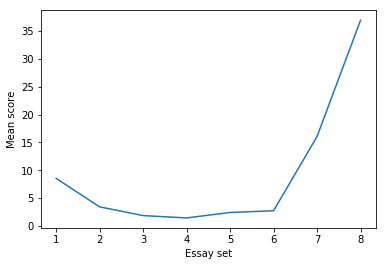

In [12]:
import numpy as np
import matplotlib.pyplot as plt

plot_data = np.zeros((8,))

for essay_set in range(1, 9):
    plot_data[essay_set-1] = ds[ds.essay_set == essay_set].domain1_score.mean()

plt.plot(range(1, 9), plot_data)
plt.xlabel('Essay set')
plt.ylabel('Mean score')
plt.show()

In [13]:
from sklearn.preprocessing import MinMaxScaler
import numpy as np

scaler = MinMaxScaler(feature_range=(0, 5))
MASK = [False, False, True]

# I use mask instead of ds.domain1_score or something like that
# because fit_transform method accepts only 2D arrays,
# but DataRows considered as 1D arrays, so fit_transform throws an error
# Luckily, DataFrames are 2D arrays
for essay_set in range(1, 9):
    essay_set_data = ds[ds.essay_set == essay_set].loc[:,MASK]
    ids = essay_set_data.index
    changed_data = np.array(scaler.fit_transform(essay_set_data)).flatten()
    ds.loc[ids, 'domain1_score'] = changed_data

We don't need essay_set column anymore, so we can drop it

In [14]:
ds = ds.drop('essay_set', 1)
ds.head()

,essay,domain1_score
essay_id,,
1,"Dear local newspaper, I think effects computer...",3.0
2,"Dear @CAPS1 @CAPS2, I believe that using compu...",3.5
3,"Dear, @CAPS1 @CAPS2 @CAPS3 More and more peopl...",2.5
4,"Dear Local Newspaper, @CAPS1 I have found that...",4.0
5,"Dear @LOCATION1, I know having computers has a...",3.0


In [26]:
ds.to_csv('data/preprocessed_train.csv')

Futher preprocessing will be in `preprocess_for_training.py`